In [2]:
cd ~/DATA/Sentinel/

/data/store01/data_dirs/students/ucfafyi/Sentinel


In [3]:
import sys
sys.path.insert(0, 'python')
from readSent import *
from nicer_plot import *
import pylab as plt
%matplotlib inline
from Dload_Finder import *
from matplotlib import cm
from skimage import exposure
from sklearn import linear_model
import scipy
from scipy import signal
import scipy.stats
import scipy.ndimage as ndimage
from fastRWpkl import *
from scipy.stats import gaussian_kde
from matplotlib import *
import pandas as pd
from scipy import interpolate
from applied import *
from Py6S import *
from smoothn import *
from scipy.interpolate import griddata
from skimage import exposure

In [8]:
sen_rsp = pd.ExcelFile('sp_rep/Sentbands.xlsx')
swl = np.array(sen_rsp.parse('Spectral Responses')['SR_WL'])
cname= 'SR_AV_B1','SR_AV_B2', 'SR_AV_B3', 'SR_AV_B4', 'SR_AV_B5','SR_AV_B6','SR_AV_B7', 'SR_AV_B8', 'SR_AV_B8A','SR_AV_B9','SR_AV_B10', 'SR_AV_B11', 'SR_AV_B12'
sen_rsr = [np.array(sen_rsp.parse('Spectral Responses')[i]) for i in cname]

In [9]:
retval = parallel_rw_pkl(None, '2308retval', 'r')

In [10]:
aerosols = np.array([[i[0], i[1], i[2][0][0]]for i in retval]).T
aero_map = np.zeros((1000, 1000))
aero_map[:,:] = np.nan
aero_map[(aerosols[0]-7500).astype(int), (aerosols[1]-6001).astype(int)] = aerosols[2]

In [11]:
weights = ((~np.isnan(aero_map)).astype('float'))
sm_aaro = smoothn(aero_map,s=20,W=weights, verbose=True, isrobust=True)

./python/smoothn.py:186: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if W != None:
./python/smoothn.py:204: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if W == None:


tol 1.0 nit 0
tol 2.3368089443 nit 1
tol 2.20493696658 nit 2
tol 2.14395823503 nit 3
tol 1.74736889847 nit 4
tol 1.48475182218 nit 5
tol 1.05525641898 nit 6
tol 0.790256651209 nit 7
tol 0.548507606618 nit 8
tol 0.39319506106 nit 9
tol 0.28046603087 nit 10
tol 0.201653105775 nit 11
tol 0.151098989922 nit 12
tol 0.11297792426 nit 13
tol 0.0912616294523 nit 14
tol 0.0735870171882 nit 15
tol 0.0646278311872 nit 16
tol 0.0564484164782 nit 17
tol 0.052427660437 nit 18
tol 0.0482024276592 nit 19
tol 0.0458816920333 nit 20
tol 0.0432622193356 nit 21
tol 0.0415529819744 nit 22
tol 0.0396558756471 nit 23
tol 0.0382303523111 nit 24
tol 0.0367204919633 nit 25
tol 0.0354770756548 nit 26
tol 0.034212967251 nit 27
tol 0.0331123017555 nit 28
tol 0.0320240106517 nit 29
tol 0.0310438328983 nit 30
tol 0.0300909014954 nit 31
tol 0.0292144467363 nit 32
tol 0.0283703861833 nit 33
tol 0.0275835971419 nit 34
tol 0.0268295297942 nit 35
tol 0.0261203705583 nit 36
tol 0.0254420753956 nit 37
tol 0.0248002650484 n

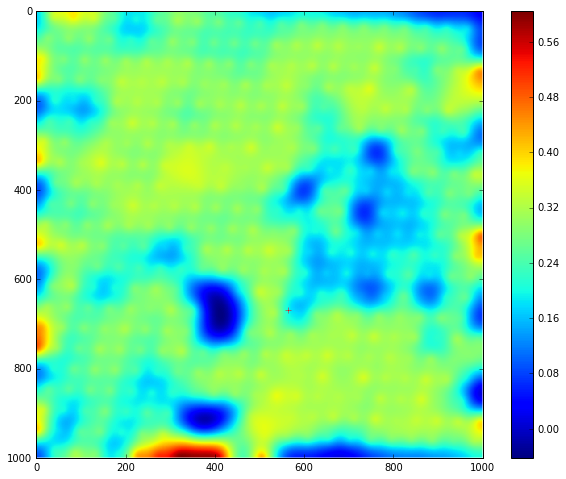

In [12]:
plt.figure(figsize=(10,8))
plt.imshow(sm_aaro[0]*10, interpolation='None')
plt.plot( 6564-6000,8168-7500, 'r+')
plt.xlim(0,1000)
plt.ylim(1000,0)
#plt.axis('off')
plt.colorbar()

In [13]:
lat, lon, year = 37.181944, 114.36, 2016
sfiles, mfiles = get_closet(lat, lon,year,0)
keys = 'B02', 'B03','B04','B08','B8A','B11','B12'
bands = [2,3,4,8,13,11,12]
i=11
fpath = sfiles[i]
atmos = readmeteo(fpath+'auxiliary/ECMWFT')
ozone = np.mean(atmos['TCO3']*46.728972)
water = np.mean(atmos['TCWV']/10.)
print water, ozone
mete = readxml(fpath+'metadata.xml')
sz = mete['mSz']
sa = mete['mSa']
vz = mete['mVz']
va = mete['mVa']

0.510586465435 0.371318171103


In [ ]:
ls '/home/ucfafyi/DATA/Sentinel/S2A_USER_PRD_MSIL2A_PDMC_20160503T130352_R075_V20160503T031631_20160503T031631.SAFE/GRANULE/S2A_USER_MSI_L2A_TL_MTI__20160503T083156_A004505_T50SKG_N02.01/IMG_DATA/R10m'

In [25]:
patchs = []
bands = ['B01', 'B02', 'B03','B04', 'B05', 'B06', 'B07', 'B08','B8A','B09', 'B10','B11','B12']
for i in range(13):
    data = gdal.Open('/home/ucfafyi/DATA/Sentinel/s_data/50/S/KG/2016/5/3/0/%s.jp2'%(bands[i])).ReadAsArray()
    band = ScaleExtent(data, (10980, 10980))
    patchs.append(band[7500:8500, 6000:7000]*0.0001)

In [26]:
patchs

[array([[ 0.145 ,  0.145 ,  0.145 , ...,  0.1279,  0.1279,  0.1279],
        [ 0.145 ,  0.145 ,  0.145 , ...,  0.1279,  0.1279,  0.1279],
        [ 0.145 ,  0.145 ,  0.145 , ...,  0.1279,  0.1279,  0.1279],
        ..., 
        [ 0.1353,  0.1353,  0.1353, ...,  0.1448,  0.1448,  0.1448],
        [ 0.1353,  0.1353,  0.1353, ...,  0.1448,  0.1448,  0.1448],
        [ 0.1353,  0.1353,  0.1353, ...,  0.1448,  0.1448,  0.1448]]),
 array([[ 0.1333,  0.1261,  0.1206, ...,  0.13  ,  0.118 ,  0.0923],
        [ 0.1448,  0.1377,  0.1288, ...,  0.1304,  0.1162,  0.0955],
        [ 0.1447,  0.1402,  0.1324, ...,  0.1342,  0.1284,  0.1275],
        ..., 
        [ 0.1173,  0.1175,  0.1185, ...,  0.1399,  0.1465,  0.1493],
        [ 0.1261,  0.1263,  0.1306, ...,  0.1532,  0.1415,  0.1229],
        [ 0.1193,  0.1259,  0.1333, ...,  0.1547,  0.1397,  0.1151]]),
 array([[ 0.1413,  0.1331,  0.1242, ...,  0.1377,  0.1149,  0.0789],
        [ 0.1542,  0.1463,  0.1315, ...,  0.136 ,  0.1156,  0.088 ],
  

In [29]:
rgb = np.zeros((1000, 1000,3))
rgb[:,:,0] = patchs[3]
rgb[:,:,1] = patchs[2]
rgb[:,:,2] = patchs[1]

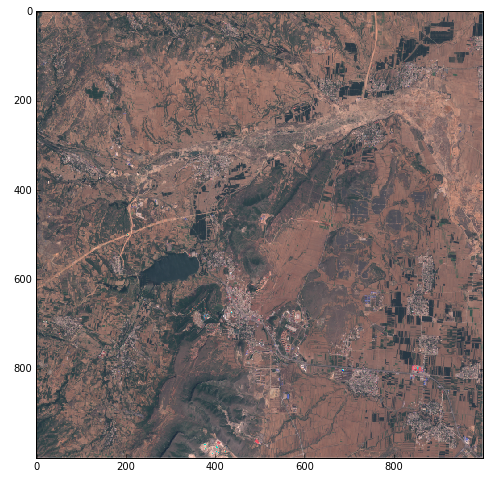

In [34]:
plt.figure(figsize=(8,8))
plt.imshow(rgb*3, interpolation='None')
plt.rec

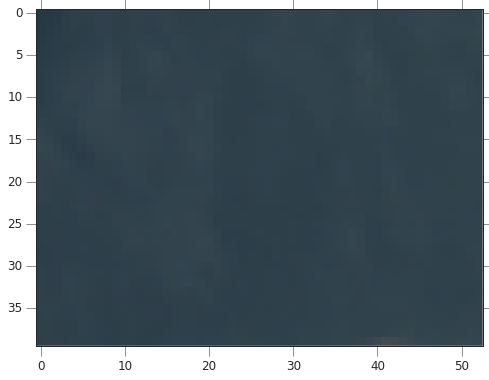

In [81]:
plt.figure(figsize=(8,8))
plt.imshow((rgb*3)[560:600, 277:330], interpolation='None')

In [78]:
parallel_rw_pkl(patchs, 'spectrals', 'w')

Length of data: 13
Length of data: 13


In [7]:
patchs = parallel_rw_pkl(None, 'spectrals', 'r')

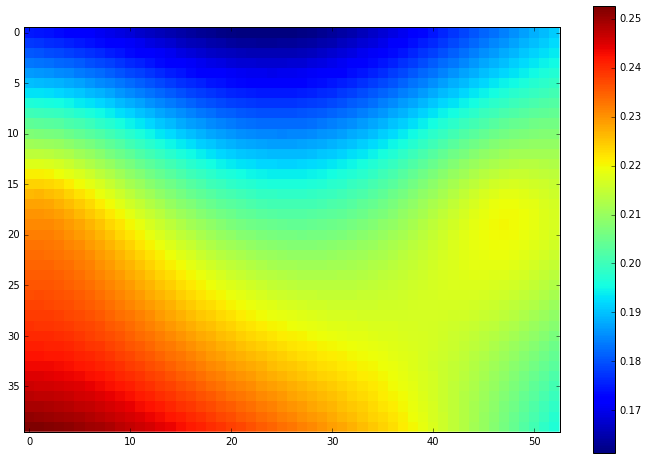

In [11]:
plt.figure(figsize=(12,8))
plt.imshow(sm_aaro[0][560:600, 277:330]*10, interpolation='None')
plt.colorbar()

In [13]:
water = []
for i in patchs:
    water.append(i[560:600, 277:330])

In [14]:
plot_config()

/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [15]:
np.array(water).shape

(13, 40, 53)

 ...]

/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


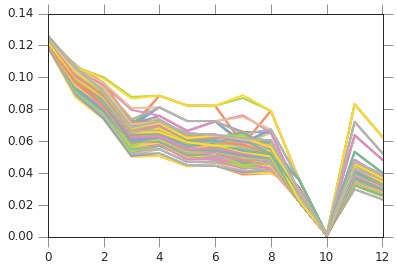

In [16]:
plt.plot(np.array(water).reshape((13, 40*53)))

In [12]:
def atm(p,sref = None, sen_rsr = None, band = None, angles = None):
    #print p
    aot550, water, ozone = p
    sa,sz, va, vz = angles
    path = '/home/ucfafyi/DATA/Downloads/6SV2.1/sixsV2.1'
    s = SixS(path)
    ss = []    
    s = SixS(path)
    s.altitudes.set_target_sea_level()
    s.altitudes.set_sensor_satellite_level()
    s.ground_reflectance = GroundReflectance.HomogeneousLambertian(GroundReflectance.LakeWater)
    s.geometry = Geometry.User()
    s.geometry.solar_a = sa
    s.geometry.solar_z = sz
    s.geometry.view_a = va[band]
    s.geometry.view_z = vz[band]
    srsp = sen_rsr[band]
    wv, we = swl[srsp!=0]/1000.,srsp[srsp!=0]
    mi,ma = round(wv.min(),3),round(wv.max(),3)
    f = interpolate.interp1d(wv,we)
    xnew = np.arange(mi,ma,0.0025)
    ynew = f(xnew)
    s.wavelength = Wavelength(xnew[0],xnew[-1],ynew)
    s.aero_profile = AeroProfile.PredefinedType(AeroProfile.Continental)
    s.aot550 = aot550
    s.atmos_profile = AtmosProfile.UserWaterAndOzone(water, ozone)
    s.atmos_corr = AtmosCorr.AtmosCorrLambertianFromReflectance(sref)
    s.run()
    return s.outputs.atmos_corrected_reflectance_lambertian

In [301]:
p = 0.19953599972771441, 0.38800000000000001, 0.037004
angles = [sa,sz, va, vz]

In [28]:
water

[array([[ 0.1194,  0.1194,  0.1194, ...,  0.1247,  0.1247,  0.1247],
        [ 0.1194,  0.1194,  0.1194, ...,  0.1247,  0.1247,  0.1247],
        [ 0.1194,  0.1194,  0.1194, ...,  0.1247,  0.1247,  0.1247],
        ..., 
        [ 0.1215,  0.1215,  0.1215, ...,  0.1252,  0.1252,  0.1252],
        [ 0.1215,  0.1215,  0.1215, ...,  0.1252,  0.1252,  0.1252],
        [ 0.1215,  0.1215,  0.1215, ...,  0.1252,  0.1252,  0.1252]]),
 array([[ 0.0877,  0.0892,  0.0902, ...,  0.0989,  0.1014,  0.1012],
        [ 0.0875,  0.0896,  0.0935, ...,  0.1022,  0.1033,  0.1015],
        [ 0.0893,  0.0911,  0.0933, ...,  0.1021,  0.102 ,  0.1017],
        ..., 
        [ 0.0963,  0.0974,  0.0978, ...,  0.1022,  0.1028,  0.102 ],
        [ 0.0958,  0.0981,  0.0985, ...,  0.1006,  0.1034,  0.1041],
        [ 0.0955,  0.0974,  0.099 , ...,  0.1031,  0.1041,  0.1057]]),
 array([[ 0.0746,  0.074 ,  0.0769, ...,  0.0883,  0.0889,  0.0901],
        [ 0.0738,  0.0756,  0.078 , ...,  0.0899,  0.0908,  0.0905],
  

In [302]:
angles, p

([array([ 143.37178471]),
  array([ 25.65012217]),
  array([ 111.39404288,  110.97246877,  113.21727347,  116.63309692,
          114.32734662,  112.9980871 ,  112.39241577,  111.95750344,
          111.56658455,  115.35167857,  111.26675666,  111.85397953,
          110.99311741]),
  array([ 4.16869465,  4.24576169,  3.77939294,  3.6199086 ,  3.71249793,
          3.8155723 ,  3.87865205,  3.94499579,  4.01542229,  3.66327504,
          4.08200649,  3.93358293,  4.10494618])],
 (0.1995359997277144, 0.388, 0.037004))

In [29]:
aots = (sm_aaro[0][560:600, 277:330]*10)

In [ ]:
cors = []
for ii,b in enumerate(water):
    
    for x in range(40):
        for y in range(53):
            v = atm([aots[x,y],0.388, 0.037004 ], b[x,y], sen_rsr, ii,angles )
            cor[x,y]=v
    cors.append(cor)

In [ ]:
parallel_rw_pkl(cors, 'correted_bands', 'w')

In [31]:
x,y = np.mgrid[0:40, 0:53]

In [32]:
x.ravel(), y.ravel().shape, (aots.ravel()).shape

(array([ 0,  0,  0, ..., 39, 39, 39]), (2120,), (2120,))

In [93]:
def applied(i, ii=None):
    indx = (x.ravel())[i]; indy = (y.ravel())[i]; aot = (aots.ravel())[i]; sen_ref = (water[ii].ravel())[i]
    cored = atm([aot,0.388, 0.037004 ], sen_ref, sen_rsr, ii,angles )
    return [indx, indy, cored]

In [96]:
cors = []
for ii in range(13):
    par = partial(applied, ii=ii)
    pool = multiprocessing.Pool(processes = 16)
    retval = pool.map(par, range(len(x.ravel())))
    pool.close()
    pool.join()
    cor = np.zeros((40, 53))
    for i in retval:
        cor[i[0], i[1]] = i[2]
    cors.append(cor)

In [87]:
retval[0]

[0, 0, 0.02951]

In [88]:
cor = np.zeros((40, 53))
for i in retval:
    cor[i[0], i[1]] = i[2]
cors.append(cor)

In [100]:
parallel_rw_pkl(np.array(cors), 'corrected_water', 'w')

In [16]:
cors =parallel_rw_pkl(None, 'corrected_water', 'r')

In [17]:
cors

array([[[ 0.0205 ,  0.02053,  0.02057, ...,  0.02679,  0.02669,  0.02659],
        [ 0.02027,  0.0203 ,  0.02034, ...,  0.02666,  0.02656,  0.02647],
        [ 0.02003,  0.02006,  0.0201 , ...,  0.02652,  0.02643,  0.02635],
        ..., 
        [ 0.01705,  0.01707,  0.01709, ...,  0.02637,  0.02651,  0.02667],
        [ 0.0169 ,  0.01692,  0.01695, ...,  0.02643,  0.02659,  0.02675],
        [ 0.01675,  0.01677,  0.0168 , ...,  0.02649,  0.02666,  0.02682]],

       [[ 0.02099,  0.02293,  0.02423, ...,  0.03434,  0.03744,  0.03711],
        [ 0.02054,  0.02324,  0.02823, ...,  0.03844,  0.03977,  0.0374 ],
        [ 0.02263,  0.02495,  0.02778, ...,  0.03821,  0.03801,  0.03756],
        ..., 
        [ 0.02675,  0.02821,  0.02876, ...,  0.03766,  0.03854,  0.03764],
        [ 0.02597,  0.02902,  0.02957, ...,  0.03566,  0.03938,  0.04039],
        [ 0.02544,  0.02797,  0.0301 , ...,  0.03891,  0.04033,  0.0425 ]],

       [[ 0.03459,  0.0339 ,  0.03738, ...,  0.05027,  0.05093,  0.0

In [109]:
water[-3]

array([[ 0.0012,  0.0012,  0.0012, ...,  0.001 ,  0.001 ,  0.001 ],
       [ 0.0012,  0.0012,  0.0012, ...,  0.001 ,  0.001 ,  0.001 ],
       [ 0.0012,  0.0012,  0.0012, ...,  0.001 ,  0.001 ,  0.001 ],
       ..., 
       [ 0.0013,  0.0013,  0.0013, ...,  0.0013,  0.0013,  0.0013],
       [ 0.0013,  0.0013,  0.0013, ...,  0.0013,  0.0013,  0.0013],
       [ 0.0013,  0.0013,  0.0013, ...,  0.0013,  0.0013,  0.0013]])

In [19]:
cors = np.array(cors).reshape((13,40*53))

In [20]:
cors[:,3]

array([ 0.02062,  0.03162,  0.04347,  0.03351,  0.04515,  0.04072,
        0.04246,  0.03884,  0.04037,  0.04363, -0.00376,  0.03722,  0.03111])

In [6]:
sb = """443	20
490	65
560	35
665	30
705	15
740	15
783	20
842	115
865	20
945	20
1380	30
1610	90
2190	180"""
sb= [i.split('\t') for i in sb.split('\n')]
wl = [float(i) for i,j in sb]

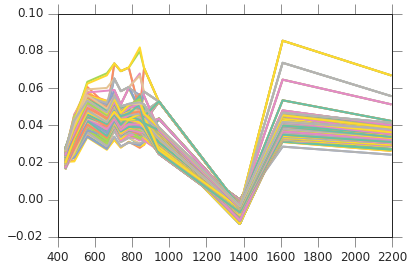

In [137]:
for i in cors.T:
    plt.plot(wl,i)  

In [119]:
ls '/home/ucfafyi/DATA/Sentinel'

R10m/  R20m/  S2A_USER_SCL_L2A_TL_MTI__20160503T083156_A004505_T50SKG_20m.jp2


In [127]:
base = 'S2A_USER_PRD_MSIL2A_PDMC_20160503T130352_R075_V20160503T031631_20160503T031631.SAFE/GRANULE/S2A_USER_MSI_L2A_TL_MTI__20160503T083156_A004505_T50SKG_N02.01/IMG_DATA/'

In [138]:
R20 = 'R20m'
R10 = 'R10m'
fns = glob.glob(base+R10+'/*')

In [133]:
glob.glob(base+R20+'/*')

['S2A_USER_PRD_MSIL2A_PDMC_20160503T130352_R075_V20160503T031631_20160503T031631.SAFE/GRANULE/S2A_USER_MSI_L2A_TL_MTI__20160503T083156_A004505_T50SKG_N02.01/IMG_DATA/R20m/S2A_USER_MSI_L2A_TL_MTI__20160503T083156_A004505_T50SKG_B02_20m.jp2',
 'S2A_USER_PRD_MSIL2A_PDMC_20160503T130352_R075_V20160503T031631_20160503T031631.SAFE/GRANULE/S2A_USER_MSI_L2A_TL_MTI__20160503T083156_A004505_T50SKG_N02.01/IMG_DATA/R20m/S2A_USER_MSI_L2A_TL_MTI__20160503T083156_A004505_T50SKG_B03_20m.jp2',
 'S2A_USER_PRD_MSIL2A_PDMC_20160503T130352_R075_V20160503T031631_20160503T031631.SAFE/GRANULE/S2A_USER_MSI_L2A_TL_MTI__20160503T083156_A004505_T50SKG_N02.01/IMG_DATA/R20m/S2A_USER_MSI_L2A_TL_MTI__20160503T083156_A004505_T50SKG_B04_20m.jp2',
 'S2A_USER_PRD_MSIL2A_PDMC_20160503T130352_R075_V20160503T031631_20160503T031631.SAFE/GRANULE/S2A_USER_MSI_L2A_TL_MTI__20160503T083156_A004505_T50SKG_N02.01/IMG_DATA/R20m/S2A_USER_MSI_L2A_TL_MTI__20160503T083156_A004505_T50SKG_B05_20m.jp2',
 'S2A_USER_PRD_MSIL2A_PDMC_20160503T

In [141]:
l2a_patchs = []
for i in fns[:4]:
    data = gdal.Open(i).ReadAsArray()
    band = ScaleExtent(data, (10980, 10980))
    l2a_patchs.append(band[7500:8500, 6000:7000]*0.0001)

In [149]:
fns

['S2A_USER_PRD_MSIL2A_PDMC_20160503T130352_R075_V20160503T031631_20160503T031631.SAFE/GRANULE/S2A_USER_MSI_L2A_TL_MTI__20160503T083156_A004505_T50SKG_N02.01/IMG_DATA/R10m/S2A_USER_MSI_L2A_TL_MTI__20160503T083156_A004505_T50SKG_B02_10m.jp2',
 'S2A_USER_PRD_MSIL2A_PDMC_20160503T130352_R075_V20160503T031631_20160503T031631.SAFE/GRANULE/S2A_USER_MSI_L2A_TL_MTI__20160503T083156_A004505_T50SKG_N02.01/IMG_DATA/R10m/S2A_USER_MSI_L2A_TL_MTI__20160503T083156_A004505_T50SKG_B03_10m.jp2',
 'S2A_USER_PRD_MSIL2A_PDMC_20160503T130352_R075_V20160503T031631_20160503T031631.SAFE/GRANULE/S2A_USER_MSI_L2A_TL_MTI__20160503T083156_A004505_T50SKG_N02.01/IMG_DATA/R10m/S2A_USER_MSI_L2A_TL_MTI__20160503T083156_A004505_T50SKG_B04_10m.jp2',
 'S2A_USER_PRD_MSIL2A_PDMC_20160503T130352_R075_V20160503T031631_20160503T031631.SAFE/GRANULE/S2A_USER_MSI_L2A_TL_MTI__20160503T083156_A004505_T50SKG_N02.01/IMG_DATA/R10m/S2A_USER_MSI_L2A_TL_MTI__20160503T083156_A004505_T50SKG_B08_10m.jp2',
 'S2A_USER_PRD_MSIL2A_PDMC_20160503T

In [143]:
fnames = glob.glob(base+R20+'/*')[3:9]

In [152]:
fnames

['S2A_USER_PRD_MSIL2A_PDMC_20160503T130352_R075_V20160503T031631_20160503T031631.SAFE/GRANULE/S2A_USER_MSI_L2A_TL_MTI__20160503T083156_A004505_T50SKG_N02.01/IMG_DATA/R20m/S2A_USER_MSI_L2A_TL_MTI__20160503T083156_A004505_T50SKG_B05_20m.jp2',
 'S2A_USER_PRD_MSIL2A_PDMC_20160503T130352_R075_V20160503T031631_20160503T031631.SAFE/GRANULE/S2A_USER_MSI_L2A_TL_MTI__20160503T083156_A004505_T50SKG_N02.01/IMG_DATA/R20m/S2A_USER_MSI_L2A_TL_MTI__20160503T083156_A004505_T50SKG_B06_20m.jp2',
 'S2A_USER_PRD_MSIL2A_PDMC_20160503T130352_R075_V20160503T031631_20160503T031631.SAFE/GRANULE/S2A_USER_MSI_L2A_TL_MTI__20160503T083156_A004505_T50SKG_N02.01/IMG_DATA/R20m/S2A_USER_MSI_L2A_TL_MTI__20160503T083156_A004505_T50SKG_B07_20m.jp2',
 'S2A_USER_PRD_MSIL2A_PDMC_20160503T130352_R075_V20160503T031631_20160503T031631.SAFE/GRANULE/S2A_USER_MSI_L2A_TL_MTI__20160503T083156_A004505_T50SKG_N02.01/IMG_DATA/R20m/S2A_USER_MSI_L2A_TL_MTI__20160503T083156_A004505_T50SKG_B8A_20m.jp2',
 'S2A_USER_PRD_MSIL2A_PDMC_20160503T

In [145]:
l2a_ = []
for i in fnames:
    data = gdal.Open(i).ReadAsArray()
    band = ScaleExtent(data, (10980, 10980))
    l2a_.append(band[7500:8500, 6000:7000]*0.0001)

In [163]:
data = range(10)

In [165]:
data[:3] = l2a_patchs[:-1]

In [167]:
data[3:6] = l2a_[:3] 

In [169]:
data[6] = l2a_patchs[-1]

In [171]:
data[7:] = l2a_[3:]

In [173]:
l2a = data

In [178]:
parallel_rw_pkl(np.array(l2a), 'L2Apatch', 'w')

In [14]:
L2A = parallel_rw_pkl(None, 'L2Apatch', 'r')

In [184]:
L2A = np.array(l2a)

In [58]:
sb = """490	65
560	35
665	30
705	15
740	15
783	20
842	115
865	20
1610	90
2190	180"""
sb= [i.split('\t') for i in sb.split('\n')]
wl = [float(i) for i,j in sb]

In [23]:
L2Awat = []
for i in L2A:
    L2Awat.append(i[560:600, 277:330])

In [24]:
L2Awat

[array([[ 0.0183,  0.0212,  0.0232, ...,  0.0397,  0.0445,  0.0441],
        [ 0.0179,  0.022 ,  0.0296, ...,  0.0462,  0.0483,  0.0447],
        [ 0.0215,  0.025 ,  0.0293, ...,  0.046 ,  0.0458,  0.0452],
        ..., 
        [ 0.0357,  0.0379,  0.0387, ...,  0.0473,  0.0484,  0.0468],
        [ 0.0347,  0.0392,  0.0401, ...,  0.0442,  0.0495,  0.0508],
        [ 0.0342,  0.0379,  0.041 , ...,  0.049 ,  0.0509,  0.0539]]),
 array([[ 0.0282,  0.0272,  0.0323, ...,  0.0526,  0.0537,  0.0558],
        [ 0.0268,  0.0301,  0.0343, ...,  0.0555,  0.0571,  0.0565],
        [ 0.0276,  0.0317,  0.037 , ...,  0.0547,  0.0566,  0.0564],
        ..., 
        [ 0.0451,  0.048 ,  0.0451, ...,  0.0552,  0.0557,  0.0558],
        [ 0.0459,  0.048 ,  0.0467, ...,  0.0536,  0.0578,  0.0593],
        [ 0.0438,  0.047 ,  0.0474, ...,  0.0598,  0.0633,  0.0588]]),
 array([[ 0.0107,  0.0119,  0.0142, ...,  0.031 ,  0.0308,  0.0332],
        [ 0.0099,  0.0123,  0.0156, ...,  0.0351,  0.0339,  0.0355],
  

In [26]:
L2A_w = np.array(L2Awat).reshape(10, 40*53).T
Six_w = cors[[1,2,3,4,5,6,7,8,11,12],].T
TOA = np.array(water)[[1,2,3,4,5,6,7,8,11,12],].reshape(10, 40*53).T

In [28]:
np.std(Six_w, axis = 0), np.std(L2A_w, axis=0), np.std(TOA, axis=0)

(array([ 0.00347371,  0.00347513,  0.00345119,  0.00340112,  0.00342366,
         0.00340254,  0.00357518,  0.00350009,  0.00390695,  0.0028471 ]),
 array([ 0.00447652,  0.00459265,  0.00430675,  0.00435604,  0.00404858,
         0.00393509,  0.00436945,  0.00396044,  0.00421947,  0.0031085 ]),
 array([ 0.00231388,  0.00259383,  0.0028412 ,  0.00287525,  0.00292934,
         0.00300741,  0.00314272,  0.00315856,  0.00363013,  0.00261061]))

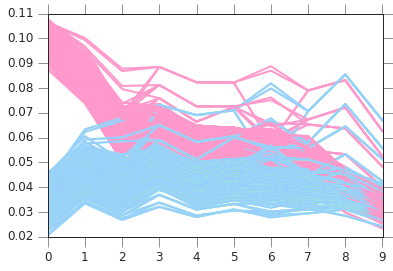

In [152]:
for i in range(len(TOA)):
    plt.plot(TOA[i], color='#ff99cc')
    plt.plot(Six_w[i], color = '#99ffcc')
    plt.plot(Six_w[i], color = '#99ccff')

In [190]:
ax.errorbar?

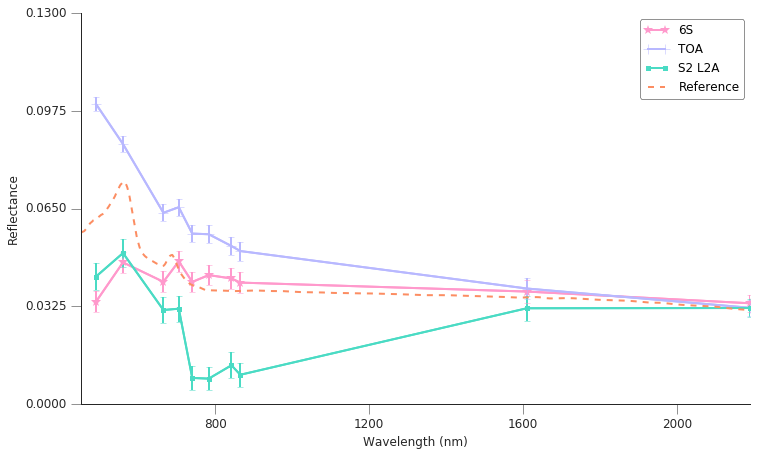

In [206]:
fig = plt.figure(figsize=(12,7))
mval = np.max([Six_w, TOA, L2A_w])
ax = fig.add_subplot(1,1,1)
ax.plot(wl,np.mean(Six_w, axis = 0),'-*', label = '6S', mew=0, ms=10, color='#ff99cc')
ax.errorbar(wl, np.mean(Six_w, axis=0), yerr= np.std(Six_w, axis=0), color='#ff99cc')
ax.plot(wl, np.mean(TOA, axis=0), '+-',label='TOA', ms=10, color='#b8b8ff')
ax.errorbar(wl, np.mean(TOA, axis=0), yerr= np.std(TOA, axis=0),color='#b8b8ff')
ax.plot(wl, np.mean(L2A_w, axis = 0),'s-', label='S2 L2A', ms=5, mew=0, color='#4adbc4')
ax.errorbar(wl, np.mean(L2A_w, axis=0), yerr= np.std(L2A_w, axis=0),color='#4adbc4')
ax.plot(seawater[:,0]*1000, seawater[:,1]*1.9, '--', label='Reference')
#plt.plot(ocean[:,0]*1000, ocean[:,1])
ax.set_xlim(450,2191)
pretty_axes(ax)
ax.set_yticks(np.linspace(0, np.round(mval*1.2, decimals=2), 5))
ax.set_ylabel('Reflectance')
ax.set_xlabel('Wavelength (nm)')
plt.legend()

In [146]:
Six_water = Six_w[]

In [148]:
Six_w<(Six_w.mean()+Six_w.std())

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ..., 
       [ True, False, False, ..., False,  True,  True],
       [ True, False, False, ..., False, False,  True],
       [ True, False, False, ..., False, False,  True]], dtype=bool)

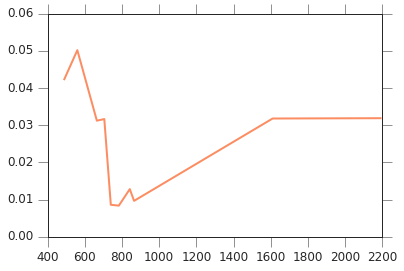

In [208]:
plt.plot(wl, np.mean(L2A_w, axis = 0))

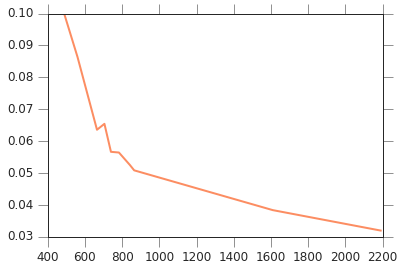

In [216]:
plt.plot(wl,np.mean(np.array(water).reshape((13, 40*53))[[1,2,3,4,5,6,7,8,11,12],], axis=1))

In [96]:
open('tap_water', 'w').write(tap_water)

In [72]:
(open('water_m4.txt', 'w')).write(water_m4)

In [58]:
seawater = np.loadtxt('costal_water.txt')
ocean = np.loadtxt('open_ocean.txt')

In [77]:
water_m1 = np.loadtxt('water_m1.txt')
water_m2 = np.loadtxt('water_m2.txt')
water_m3 = np.loadtxt('water_m3.txt')
water_m4 = np.loadtxt('water_m4.txt')

In [97]:
tap_water = np.loadtxt('tap_water')

In [102]:
tap_water[:,0]

array([ 14.011,  13.973,  13.936, ...,   0.402,   0.401,   0.4  ])

(0, 2191)

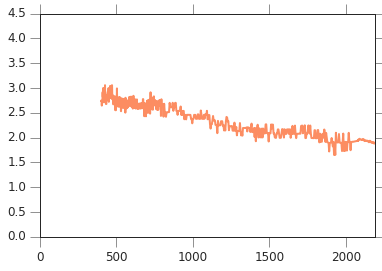

In [105]:
plt.plot(tap_water[:,0][::-1]*1000, tap_water[:,1][::-1])
plt.xlim(0,2191)

In [117]:
open('spring', 'w').write(spring)

In [118]:
spring = np.loadtxt('spring')

In [124]:
open('read_costal_water', 'w').write(red_costal)

In [127]:
red_costal = np.loadtxt('read_costal_water')

In [216]:
bands = ['B01', 'B02', 'B03','B04', 'B05', 'B06', 'B07', 'B08','B8A','B09', 'B10','B11','B12']

array([[ 0.29  ,  0.29  ,  0.2787, ...,  0.2701,  0.3068,  0.3068],
       [ 0.29  ,  0.29  ,  0.2787, ...,  0.2701,  0.3068,  0.3068],
       [ 0.2959,  0.2959,  0.2808, ...,  0.2743,  0.3114,  0.3114],
       ..., 
       [ 0.2148,  0.2148,  0.2228, ...,  0.1714,  0.1941,  0.1941],
       [ 0.2324,  0.2324,  0.2445, ...,  0.2292,  0.2557,  0.2557],
       [ 0.2324,  0.2324,  0.2445, ...,  0.2292,  0.2557,  0.2557]])

In [15]:
NDVI = (patchs[7]- patchs[3])/(patchs[7]+ patchs[3])

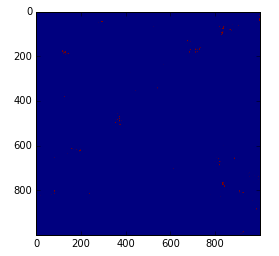

In [16]:
plt.imshow(NDVI>0.72)

In [47]:
veg = NDVI>0.71

In [48]:
vegs = []
for i in np.array(patchs)[[1,2,3,4,5,6,7,8,11,12],]:
    vegs.append(i[veg])    

In [49]:
np.array(vegs).shape

(10, 2929)

In [50]:
aots = (sm_aaro[0][veg]*10)

In [51]:
inds = np.random.choice(range(2929), 2000)

In [52]:
to_cor_veg = np.array(vegs)[:,inds]
used_aot = aots[inds]

In [53]:
to_cor_veg.shape, used_aot.shape

((10, 2000), (2000,))

 ...]

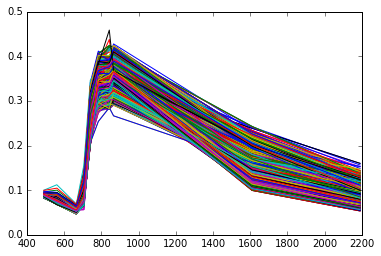

In [59]:
plt.plot(wl, np.array(to_cor_veg))

In [350]:
def atm(p,sref = None, sen_rsr = None, band = None, angles = None):
    #print p
    aot550, water, ozone = p
    sa,sz, va, vz = angles
    path = '/home/ucfafyi/DATA/Downloads/6SV2.1/sixsV2.1'
    s = SixS(path)
    ss = []    
    s = SixS(path)
    s.altitudes.set_target_sea_level()
    s.altitudes.set_sensor_satellite_level()
    s.ground_reflectance = GroundReflectance.HomogeneousLambertian(GroundReflectance.GreenVegetation)
    s.geometry = Geometry.User()
    s.geometry.solar_a = sa
    s.geometry.solar_z = sz
    s.geometry.view_a = va[band]
    s.geometry.view_z = vz[band]
    srsp = sen_rsr[band]
    wv, we = swl[srsp!=0]/1000.,srsp[srsp!=0]
    mi,ma = round(wv.min(),3),round(wv.max(),3)
    f = interpolate.interp1d(wv,we)
    xnew = np.arange(mi,ma,0.0025)
    ynew = f(xnew)
    s.wavelength = Wavelength(xnew[0],xnew[-1],ynew)
    s.aero_profile = AeroProfile.PredefinedType(AeroProfile.Continental)
    s.aot550 = aot550
    s.atmos_profile = AtmosProfile.UserWaterAndOzone(water, ozone)
    s.atmos_corr = AtmosCorr.AtmosCorrLambertianFromReflectance(sref)
    s.run()
    return s.outputs.atmos_corrected_reflectance_lambertian

In [355]:
def applied(i, ii=None):
    aot = (used_aot.ravel())[i]; sen_ref = (to_cor_veg[ii].ravel())[i]
    cored = atm([aot,0.388, 0.037004 ], sen_ref, sen_rsr, ii,angles )
    return [i, cored]

In [356]:
cored_veg= []
for ii in range(10):
    par = partial(applied, ii=ii)
    pool = multiprocessing.Pool(processes = 16)
    retval = pool.map(par, range(len(used_aot.ravel())))
    pool.close()
    pool.join()
    cored_veg.append(retval)

In [357]:
parallel_rw_pkl(np.array(cored_veg), 'cored_veg', 'w')

In [27]:
cored_veg = parallel_rw_pkl(None, 'cored_veg', 'r')

In [28]:
six_veg = np.array(cored_veg)[:,:,1]

In [31]:
six_veg.shapeb

(10, 2000)

In [60]:
plot_config()

/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [36]:
six_veg.shape

(10, 2000)

In [ ]:
plt.plot(wl, six_veg)

In [41]:
six_veg.shape

(10, 2000)

In [43]:
np.array(wl)

array([  443.,   490.,   560.,   665.,   705.,   740.,   783.,   842.,
         865.,   945.,  1380.,  1610.,  2190.])

In [44]:
L2_veg = []
for i in L2A:
    L2_veg.append(i[veg])

In [55]:
L2_vegs = (np.array(L2_veg)[:,inds])

 ...]

/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


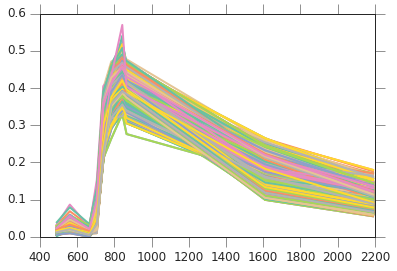

In [61]:
plt.plot(wl, L2_vegs)

In [63]:
ref_veg = parallel_rw_pkl(None,'emulation', 'r')

In [64]:
prosail=ref_veg[2]

In [82]:
parallel_rw_pkl(prosail, 'ref_vegs', 'w')

In [84]:
parallel_rw_pkl(six_veg, 'six_veg', 'w')

In [85]:
parallel_rw_pkl(to_cor_veg, 'to_cor_veg', 'w')

In [86]:
parallel_rw_pkl(L2_vegs, 'L2_vegs', 'w')

In [67]:
wv = np.arange ( 400, 2501 )

In [88]:
665-400, 842-400

(265, 442)

In [94]:
prosail.shape

(10000, 2101)

In [95]:
ndvi = (prosail[:,442]-prosail[:,265])/(prosail[:,442]+prosail[:,265])

In [98]:
m = ndvi>0.71

In [104]:
prosail[m].shape

(4743, 2101)

In [ ]:
1,2,3,4,5,6,7,8,11,12

In [87]:
wl

[490.0, 560.0, 665.0, 705.0, 740.0, 783.0, 842.0, 865.0, 1610.0, 2190.0]

In [105]:
ranind = np.random.choice(range(4743), 2000)

In [109]:
refveg = prosail[m][ranind]

In [111]:
refveg.shape

(2000, 2101)

(2000, 10)

In [124]:
interp

array([   90.,   160.,   265.,   305.,   340.,   383.,   442.,   465.,
        1210.,  1790.])

In [122]:
interp = np.array(wl)-400

In [135]:
sail_veg = refveg[:, interp.astype(int)].T

In [140]:
mask = (sail_veg[-4]<0.4)&((sail_veg[-4]>0.3))

In [144]:
.shape

(10, 784)

<Container object of 3 artists>

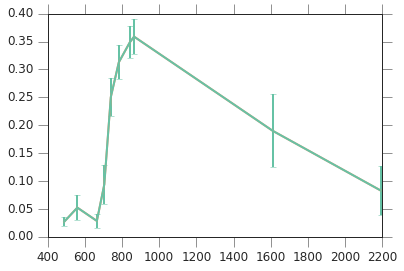

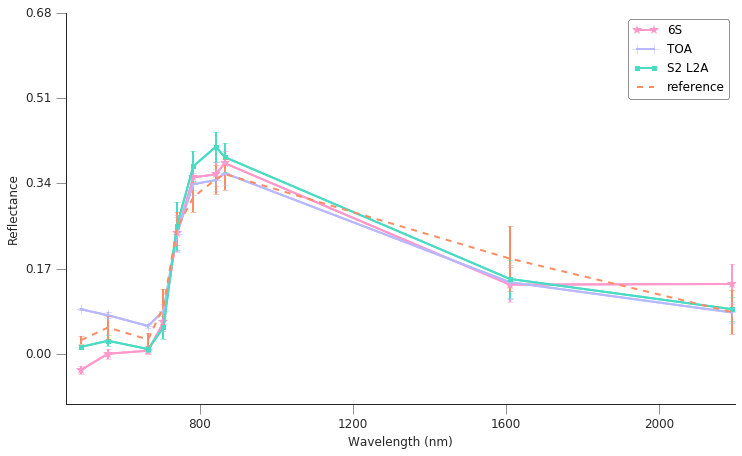

In [165]:
fig = plt.figure(figsize=(12,7))
mval = np.max([six_veg, to_cor_veg, L2_vegs])
ax = fig.add_subplot(1,1,1)
ax.plot(wl,np.mean(six_veg, axis = 1),'-*', label = '6S', mew=0, ms=10, color='#ff99cc')
ax.errorbar(wl, np.mean(six_veg, axis=1), yerr= np.std(six_veg, axis=1), color='#ff99cc')
ax.plot(wl, np.mean(to_cor_veg, axis=1), '+-',label='TOA', ms=10, color='#b8b8ff')
ax.errorbar(wl, np.mean(to_cor_veg, axis=1), yerr= np.std(to_cor_veg, axis=1),color='#b8b8ff')
ax.plot(wl, np.mean(L2_vegs, axis = 1),'s-', label='S2 L2A', ms=5, mew=0, color='#4adbc4')
ax.errorbar(wl, np.mean(L2_vegs, axis=1), yerr= np.std(L2_vegs, axis=1),color='#4adbc4')
ax.plot(wl, np.mean(sail_veg[:,mask],axis=1), '--',label='reference', color='#FC8D62')
ax.errorbar(wl, np.mean(sail_veg[:,mask],axis=1), yerr = np.std(sail_veg[:,mask],axis=1),fmt=None, ecolor='#FC8D62')
#plt.plot(ocean[:,0]*1000, ocean[:,1])
ax.set_xlim(450,2199)
pretty_axes(ax)
ax.set_yticks(np.linspace(0, np.round(mval*1.2, decimals=2), 5))
ax.set_ylabel('Reflectance')
ax.set_xlabel('Wavelength (nm)')
plt.legend()

In [156]:
ax.errorbar?

In [332]:
np.mean(six_veg, axis = 1).shape

(10,)